Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 606s 12ms/sample - loss: 1.6290 - sparse_categorical_accuracy: 0.4021 - val_loss: 1.4205 - val_sparse_categorical_accuracy: 0.4950
Epoch 2/5
50000/50000 [==============================] - 678s 14ms/sample - loss: 1.2836 - sparse_categorical_accuracy: 0.5486 - val_loss: 1.2396 - val_sparse_categorical_accuracy: 0.5614
Epoch 3/5
50000/50000 [==============================] - 707s 14ms/sample - loss: 1.1430 - sparse_categorical_accuracy: 0.6046 - val_loss: 1.5561 - val_sparse_categorical_accuracy: 0.4783
Epoch 4/5
50000/50000 [==============================] - 570s 11ms/sample - loss: 1.0563 - sparse_categorical_accuracy: 0.6376 - val_loss: 1.1750 - val_sparse_categorical_accuracy: 0.5985
Epoch 5/5
50000/50000 [==============================] - 565s 11ms/sample - loss: 0.9884 - sparse_categorical_accuracy: 0.6612 - val_loss: 1.0404 - val_sparse_categorical_accuracy: 0.6476
Model: "al

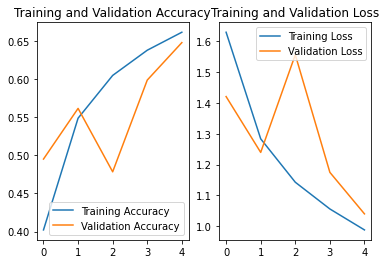

In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,BatchNormalization,Activation,Dropout
from tensorflow.keras import Model,Sequential
from tensorflow.keras import datasets
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)

cifar10 = datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class AlexNet8(Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        self.c1 = Conv2D(filters=96, kernel_size=(3, 3))
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c2 = Conv2D(filters=256, kernel_size=(3, 3))
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c3 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c4 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                         activation='relu')
        self.p3 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(2048, activation='relu')
        self.d1 = Dropout(0.5)
        self.f2 = Dense(2048, activation='relu')
        self.d2 = Dropout(0.5)
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)

        x = self.c3(x)

        x = self.c4(x)

        x = self.c5(x)
        x = self.p3(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d1(x)
        x = self.f2(x)
        x = self.d2(x)
        y = self.f3(x)
        return y
model = AlexNet8()

model.compile(optimizer="adam",
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=["sparse_categorical_accuracy"])

checkpoint_save_path = "./checkpoint/AlexNet8.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print("------load the model-----")
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

print("保存权重")
with open('./weights.txt','w') as f:
    for v in model.trainable_variables:
        f.writelines(str(v.name))
        f.writelines(str(v.shape))
        f.writelines(str(v.numpy()))

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss,label="Training Loss")
plt.plot(val_loss,label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()